<a href="https://colab.research.google.com/github/azrazainol/DS-Week-15/blob/main/Data_Science_Week_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 15: Data Analysis**

Please refer to the textbook: "[Python for Data Analysis](https://wesmckinney.com/book/)" by Wes McKinney for details of this topic on Chapter 13

In [1]:
# start by importing NumPy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

### **15.1 Bitly Data from 1.USA.gov**
In 2011, the URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil.


In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
# Access the raw data here: https://bit.ly/3HbPOjE
# Create a variable to save the URL string
# This file is in JSON format
path = "/content/drive/MyDrive/STQD6014_P137262/example.txt"

In [12]:
# using json module to load the data
# [json.loads(line) for line in f] -> iterates over each line in the file (f);
# applies json.loads() to convert each line from JSON format to a Python object;
# collects these objects into a list named records
import json
with open (path) as f:
  records = [json.loads(line) for line in f]

In [14]:
# object records is now a list of Python dictionary
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### **Counting Time Zones in Pure Python**
finding the time zones that **occur most often** in the dataset (***the tz field***)

In [13]:
# Extract a list of time zones
time_zones = [rec['tz'] for rec in records if "tz" in rec]
time_zones[:15]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [16]:
# Produce a count by time zone - harder way
# using dictionary to store counts
# 'counts[x] += 1' -> If an element is already present in the dictionary, it increments its count by one
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [17]:
# get the time zone count data
counts = get_counts(time_zones)
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [19]:
# Accessing single element
counts["Asia/Hong_Kong"]

10

In [20]:
# Numbers of time zone in records
len(time_zones)

3440

In [21]:
# Define a top_counts() function -> to get top 10 time zones and their counts
# Output as a tuple
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [22]:
# top ten time zones
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [23]:
# simpler way
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### **Counting Time Zones with pandas**

In [25]:
# Transform the records object to a pandas DataFrame
frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [26]:
# basic information about the DataFrame
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [27]:
# look at the tz column
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [28]:
# Count tz information
tz_counts = frame["tz"].value_counts()
tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [29]:
# zooming in to time zone variable
frame["tz"]

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [31]:
# filling in NA with specific string
clean_tz = frame["tz"].fillna("NA")
clean_tz[clean_tz == ""] = "Unknown Time Zone"
tz_counts = clean_tz.value_counts()
tz_counts.head(10)

America/New_York       1251
Unknown Time Zone       521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
NA                      120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

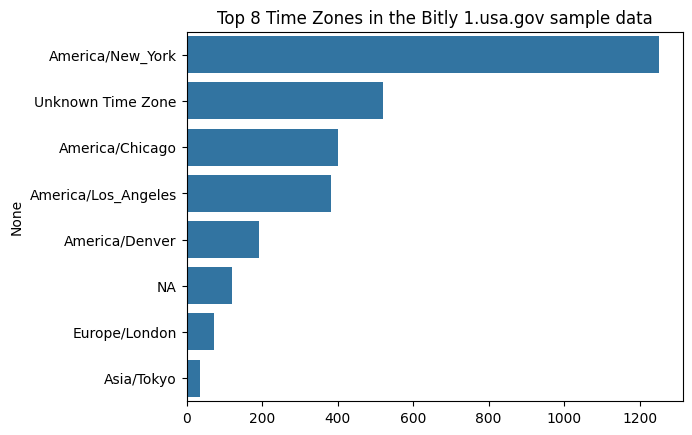

In [34]:
# from matplotlib.pyplot import title
# make a horizontal bar plot
# default for head is 5 rows if no argument is provided
subset = tz_counts.head(8)
ax = sns.barplot(y = subset.index, x = subset.to_numpy())
ax.set_title("Top 8 Time Zones in the Bitly 1.usa.gov sample data");

#### **Working on other field in the Bitly dataset**


In [35]:
# the "a" field contains information about the browser, device, or application
# used to perform the URL shortening
frame["a"].head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [36]:
# acessing single element
frame["a"][4]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [38]:
# long line
frame["a"][4][:11]

'Mozilla/5.0'

In [41]:
# splitting the data and make another summary
# about browser capability
res = pd.Series([x.split()[0] for x in frame["a"].dropna()])
res.head(8)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
dtype: object

In [42]:
# make the count summary
res.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

#### **We want to decompose the top time zones into Windows and non-Windows users.**

In [43]:
# first filter out missing data
cframe = frame[frame["a"].notna()].copy()
cframe[["a"]]

,a
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,GoogleMaps/RochesterNY
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557,GoogleMaps/RochesterNY
3558,GoogleProducer


In [44]:
# compute a value for whether or not each row is Windows
# adding as a new column
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [46]:
# groupby time zone and os column
# Create an intermediate by_tz_os object
by_tz_os = cframe.groupby(['tz', "os"])

In [47]:
# Using size() function to get count data
# This is a long format table -> vertically arranged
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [48]:
# 1. reshape by_tz_os.size() into Not Windows and Windows columns
# 2. fillna = 0
# 3. put into variable called agg_counts
# This is a wide format -> horizontally arranged
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [49]:
# Sum along the columns (axis = 1)
agg_counts.sum(axis = 1)

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [50]:
# select the top overall time zones
# computing the row counts with agg_counts.sum("axis=1")
# call argsort() to obtain an index array that can be used to sort in ascending order
indexer = agg_counts.sum(axis = 1).argsort()
indexer.values[-10:]

array([35, 78, 96, 59, 77, 15, 22, 12,  0, 29])

In [51]:
# use the indexer to select the rows
# slice off the last 10 rows (largest values)
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [52]:
# To get the sum
count_subset_sum = count_subset.copy()
count_subset_sum["Sum"] = count_subset_sum.sum(axis = 1)
count_subset_sum

os,Not Windows,Windows,Sum
tz,,,
America/Sao_Paulo,13.0,20.0,33.0
Europe/Madrid,16.0,19.0,35.0
Pacific/Honolulu,0.0,36.0,36.0
Asia/Tokyo,2.0,35.0,37.0
Europe/London,43.0,31.0,74.0
America/Denver,132.0,59.0,191.0
America/Los_Angeles,130.0,252.0,382.0
America/Chicago,115.0,285.0,400.0
,245.0,276.0,521.0


In [53]:
# Display agg_counts content
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [54]:
# Using pandas way
agg_counts.sum(axis = 1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [ ]:
# Display count_subset content
# This is in stack format


os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [56]:
# Transform the data frame from wide to long format
# Exam!! data wrangling & aggregation
count_subset_stack = count_subset.stack()
count_subset_stack.name = "Total"
count_subset_stack = count_subset_stack.reset_index()
count_subset_stack.head(10)

,tz,os,Total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


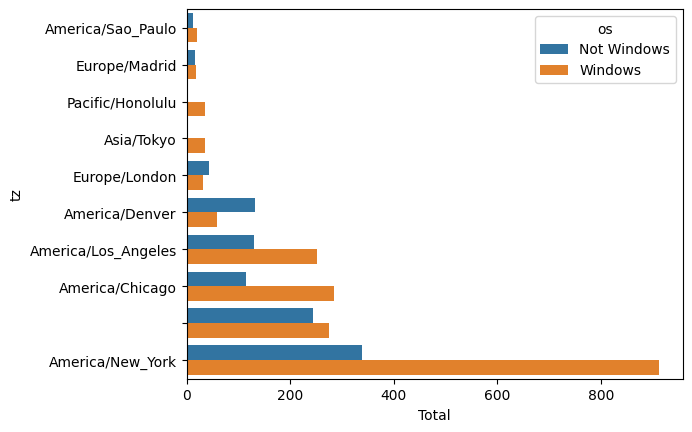

In [57]:
# plotted in a grouped bar plot
sns.barplot(x = "Total", y = "tz", hue = "os", data = count_subset_stack);

In [58]:
# normalize the group percentages to sum = 1
def norm_total(group):
    group["normed_total"] = group["Total"] / group["Total"].sum()
    return group

res = count_subset_stack.groupby("tz", group_keys = False).apply(norm_total)
res.head()

,tz,os,Total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000


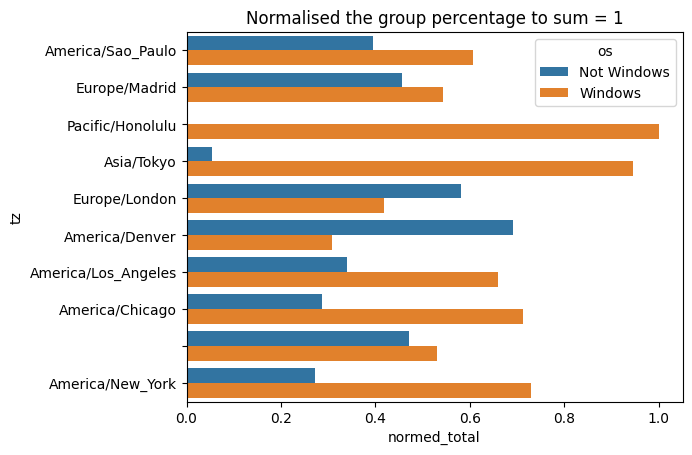

In [60]:
# Barplot
ax = sns.barplot(x = "normed_total", y = "tz", hue = "os", data = res)
ax.set_title("Normalised the group percentage to sum = 1");

# **15.2 US Baby Names 1880–2022**
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through 2022 (**access date**: **2024-01-16 11:51 +8:00**).

In [ ]:
# Upload the 2022 files
#from google.colab import files
#files.upload()

In [ ]:
# Move the yob2022.txt file to your own folder
!mv /content/yob2022.txt /content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/yob2022.txt

mv: cannot stat '/content/yob2022.txt': No such file or directory


In [ ]:
# Using the Unix head command to look at the first 10 lines of one of the files
# This is in comma-separated format
!head -n 10 /content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/yob2022.txt

Olivia,F,16573
Emma,F,14435
Charlotte,F,12891
Amelia,F,12333
Sophia,F,12310
Isabella,F,11662
Ava,F,11039
Mia,F,11018
Evelyn,F,9289
Luna,F,8922


In [ ]:
# Load the yob2022.txt into a DataFrame with pandas.read_csv


,name,sex,births
0,Olivia,F,16573
1,Emma,F,14435
2,Charlotte,F,12891
3,Amelia,F,12333
4,Sophia,F,12310
5,Isabella,F,11662
6,Ava,F,11039
7,Mia,F,11018
8,Evelyn,F,9289
9,Luna,F,8922


In [ ]:
# Contain only names with at least five occurrences in each year
# use groupby to calculate sum of Female and Male baby in 2022


sex
F    1628730
M    1733166
Name: births, dtype: int64

# **Upload all the yob files from 1880 to 2022**  :)

In [ ]:
# assemble all of the YOB data into a single DataFrame
# add a year field
# using pandas.concat() function
pieces = []
for year in range(1880, 2023):
    path = f"/content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/YOB/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year


# Concatenate everything into a single DataFrame


In [ ]:
# Display names DataFrame
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [ ]:
# Aggregate the names DataFrame by year


sex,F,M
year,,
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913
2022,1628730,1733166


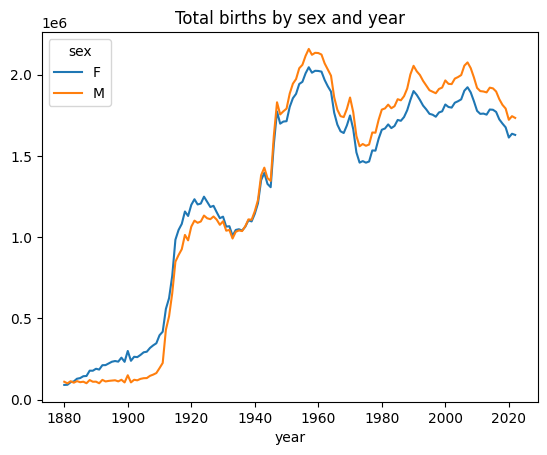

In [ ]:
# Plot a line plot


# ***Our observation:***

1. More number of female births < 1930
2. More number of male births > 1950

Read this [interesting article](https://www.pewresearch.org/short-reads/2022/08/31/global-population-skews-male-but-un-projects-parity-between-sexes-by-2050/) about ***global population***

In [ ]:
# Calculate fraction of babies given each name relative to the total number of births
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group



In [ ]:
# Display names DataFrame
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


In [ ]:
# Perform sanity check to ensure the prop column sums to 1 within all the groups


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [ ]:
# Extract the top 1,000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

# Create intermediate file


# Get top 1000 data


# Display top few rows


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [ ]:
# Drop the group index


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
285871,Atharv,M,223,2022,0.000129
285872,Imran,M,223,2022,0.000129
285873,Asaiah,M,223,2022,0.000129
285874,Kalel,M,222,2022,0.000128


### **Analyzing Naming Trends**

In [ ]:
# split the top one thousand names into the boy and girl portions


In [ ]:
# form a pivot table of the total number of births by year and name


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,12.0,6.0,14.0,48.0,NaN,38.0,NaN,NaN,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,...,8.0,NaN,20.0,52.0,NaN,43.0,NaN,NaN,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,...,23.0,NaN,28.0,46.0,NaN,33.0,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,...,23.0,7.0,30.0,42.0,NaN,45.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1880 to 2022
Columns: 7322 entries, Aaden to Zyon
dtypes: float64(7322)
memory usage: 8.0 MB


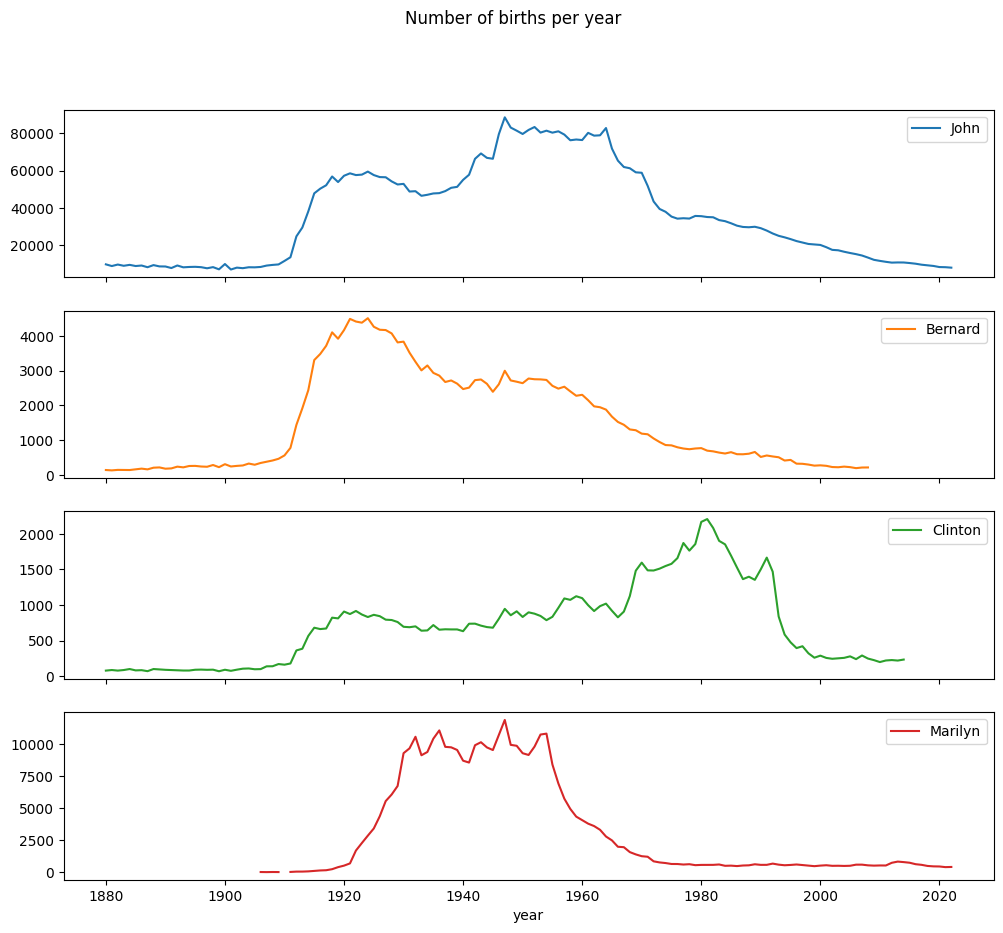

In [ ]:
# Get total births info


# Subset of names


# Plot line plot


# ***Our observation:***

We might conclude that these names have grown out of favor with the American population. **But is that right?**

# **Measuring the increase in naming diversity**

In [ ]:
# Extract proportion of births represented by the top 1,000 most popular names
# aggregate year and sex



# Line plot by year and sex


NameError: name 'top1000' is not defined

# ***Our observation:***

there appears to be increasing name diversity (decreasing total proportion in the top one thousand).

# ***Boy names that became girl names (and vice versa)***

1. Another fun trend is looking at names that were more popular with one gender earlier in the sample but have become preferred as a name for the other gender over time.
2. One example is the name Lesley or Leslie.

In [ ]:
# Extract unique names from top1000


# Extract unique names contain "Lesl"


# Display lesley_like content


# Extract just lesley_like names


# Compute sum births grouped by name to see their relative frequencies


# aggregate by sex and year, and normalize within year


# Display table content


# Normalize within year


sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2018,1.000000,NaN
2019,1.000000,NaN
2020,1.000000,NaN


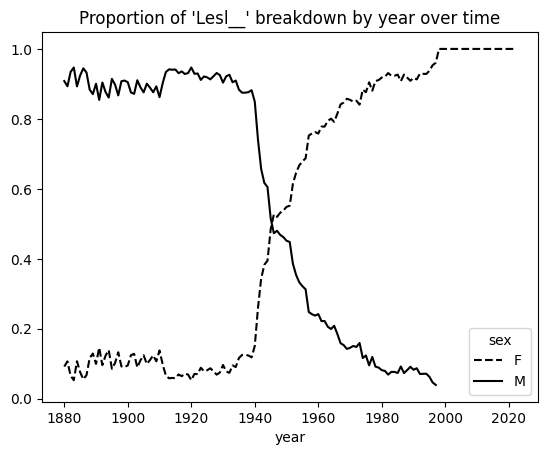

In [ ]:
# line plot breakdown by sex over time for "Lesl__"


# Thank you for hanging there with me over the past 7 weeks.

# I hope you've gained valuable knowledge during this time!

# I'll see you all when I see you all :)

# **Best of luck on your final exam!**